##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-08-27 18:55:36--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 173.194.76.128, 66.102.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  27.6MB/s    in 6.9s    

2020-08-27 18:55:44 (27.6 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-08-27 18:55:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/

In [3]:
#unzipping and organizing files
import os
import zipfile

local_train_zip = '/tmp/rps_train.zip'
zip_ref = zipfile.ZipFile(local_train_zip, 'r')
zip_ref.extractall('/tmp/rps')
zip_ref.close()

local_test_zip = '/tmp/rps_test.zip'
zip_ref = zipfile.ZipFile(local_test_zip, 'r')
zip_ref.extractall('/tmp/rps')
zip_ref.close()

In [4]:
#setting directories and making sure data is all evenly distributed
rock_test_dir = os.path.join('/tmp/rps/rps_test/rock')
rock_train_dir = os.path.join('/tmp/rps/rps_train/rock')

paper_test_dir = os.path.join('/tmp/rps/rps_test/paper')
paper_train_dir = os.path.join('/tmp/rps/rps_train/paper')

scissors_test_dir = os.path.join('/tmp/rps/rps_test/scissors')
scissors_train_dir = os.path.join('/tmp/rps/rps_train/scissors')

print("total rock training", len(os.listdir(rock_train_dir)))
print("total rock testing", len(os.listdir(rock_test_dir)))

print("\ntotal paper training", len(os.listdir(paper_train_dir)))
print("total paper testing", len(os.listdir(paper_test_dir)))

print("\ntotal scissors training", len(os.listdir(scissors_train_dir)))
print("total scissors testing", len(os.listdir(scissors_test_dir)))

total rock training 840
total rock testing 124

total paper training 840
total paper testing 124

total scissors training 840
total scissors testing 124


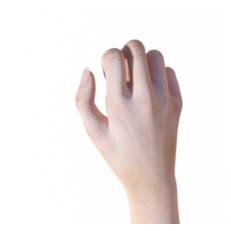

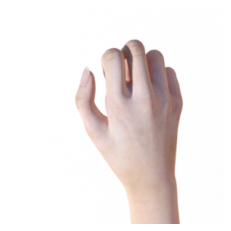

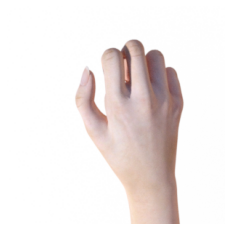

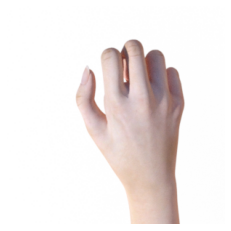

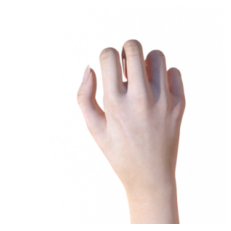

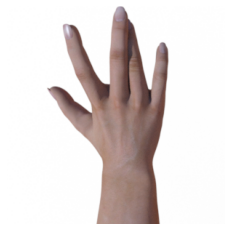

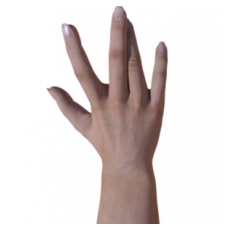

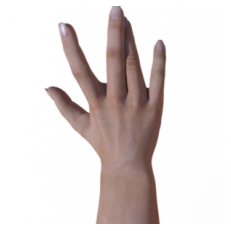

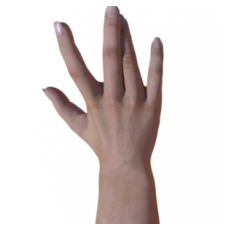

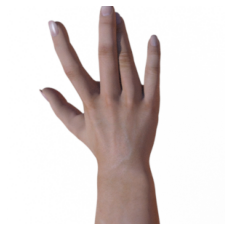

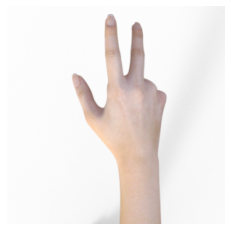

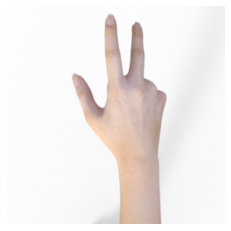

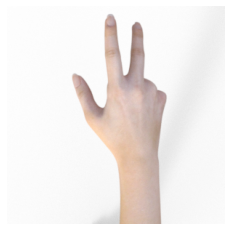

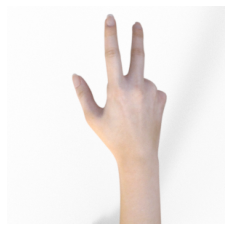

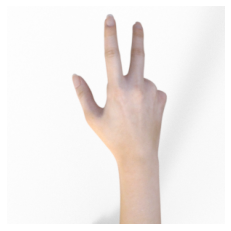

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#looking at some images
def show_images(train_test, rps):
  for i in range(5):
    path = '/tmp/rps/{train_test}/{rps}/{rps}01-00{index}.png'\
    .format(train_test = train_test, \
            rps = rps, \
            index = i)
    
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

show_images("rps_train", "rock")
show_images("rps_train", "paper")
show_images("rps_train", "scissors")

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

#augmenting data and creatng imagedatagen
training_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [7]:
TRAINING_DIR = "/tmp/rps/rps_train"
VALIDATION_DIR = "/tmp/rps/rps_test"

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=14
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Epoch 1/25
20/20 [==============================] - 24s 1s/step - loss: 1.2974 - accuracy: 0.3556 - val_loss: 1.3533 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 23s 1s/step - loss: 1.1403 - accuracy: 0.3980 - val_loss: 0.9762 - val_accuracy: 0.5806
Epoch 3/25
20/20 [==============================] - 23s 1s/step - loss: 1.0102 - accuracy: 0.5107 - val_loss: 0.8018 - val_accuracy: 0.6022
Epoch 4/25
20/20 [==============================] - 23s 1s/step - loss: 0.8863 - accuracy: 0.5861 - val_loss: 0.6392 - val_accuracy: 0.6371
Epoch 5/25
20/20 [==============================] - 23s 1s/step - loss: 0.8455 - accuracy: 0.6083 - val_loss: 0.5199 - val_accuracy: 0.6747
Epoch 6/25
20/20 [==============================] - 23s 1s/step - loss: 0.6898 - accuracy: 0.7083 - val_loss: 0.2285 - val_accuracy: 0.9409
Epoch 7/25
20/20 [==============================] - 23s 1s/step - loss: 0.6707 - accuracy: 0.7163 - val_loss: 0.3624 - val_accuracy: 0.9731
Epoch 8/25
20/20 [==

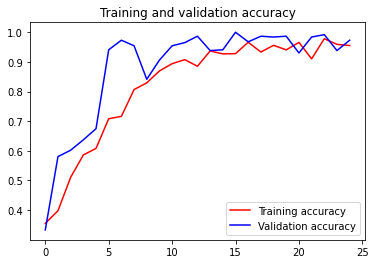

<Figure size 432x288 with 0 Axes>

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving paper.jpg to paper (2).jpg
paper.jpg is paper, correct answer is:  paper


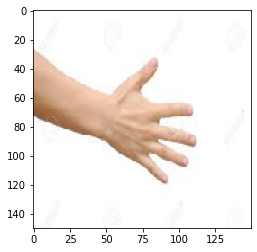

In [28]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  classes_list = list(classes[0])

  #showing correct answer and what model predicted
  largest = -111
  largest_index = 0
  correct_answer = ""

  for i in range(len(classes_list)):
    if classes_list[i] > largest:
      largest = classes_list[i]
      largest_index = i
  
  if largest == classes_list[0]:
    correct_answer = "paper"
  elif largest == classes_list[1]:
    correct_answer = "scissors"
  elif largest == classes_list[2]:
    correct_answer = "rock"

  if largest_index == 0:
    print(fn, "is paper, correct answer is: ", correct_answer)
  elif largest_index == 1:
    print(fn, "is rock, correct answer is: ", correct_answer)
  elif largest_index == 2:
    print(fn, "is scissors, correct answer is: ", correct_answer)

  #show image
  plt.imshow(img)